<a href="https://colab.research.google.com/github/GeraltAI/mi-primer-repositorio/blob/main/Investigaci%C3%B3n_algoritmos_de_b%C3%BAsqueda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Investigación del rendimiento de los algoritmos de búsqueda: búsqueda binaria vs búsqueda secuencial.

---

En este cuaderno comparo el tiempo de búsqueda de dos algoritmos: búsqueda secuencial y búsqueda binaria. La motivación de realizar este análisis parte de mi estudio sobre estos algoritmos, en donde encontré que la busqueda binaria es mas eficiente que la secuencial frente a datos ordenados. La pregunta natural (que se responde en las siguientes líneas de codigo) es: ¿Qué tanto mejor?  

In [1]:
import time
import random

In [2]:
def búsqueda_secuencial(lista, objetivo): # definimos el algoritmo de búsqueda secuencial
  for i in range(len(lista)):
      if lista[i] == objetivo:
          return i
  return -1


def búsqueda_binaria(lista, objetivo, límite_inferior=None, límite_superior=None): # definimos el algoritmo de búsqueda binaria
  if límite_inferior is None:
      límite_inferior = 0 # Inicio de la lista
  if límite_superior is None:
      límite_superior = len(lista) - 1 # Final de la lista

  if límite_superior < límite_inferior:
      return -1

  punto_medio = (límite_inferior + límite_superior) // 2

  if lista[punto_medio] == objetivo:
      return punto_medio
  elif objetivo < lista[punto_medio]:
      return búsqueda_binaria(lista, objetivo, límite_inferior, punto_medio-1)
  else:
      return búsqueda_binaria(lista, objetivo, punto_medio+1, límite_superior)
# esta parte de código esta inspirada en el trabajo de estefaniacn en GitHub, de donde estudie estos algoritmos de búsqueda.

In [3]:
import pandas as pd

# Generamos un conjunto de datos para observar el comportamiento de los algoritmos de búsqueda

df = pd.DataFrame(columns=['elementos','búsqueda_secuencial','búsqueda_binaria'])

for tamaño in range(1000,30000+1000,1000):

    
    conjunto_inicial = set()

    while len(conjunto_inicial) < tamaño:
        conjunto_inicial.add(random.randint(-3*tamaño, 3*tamaño))
                                                             
    lista_ordenada = sorted(list(conjunto_inicial))

    # Medir el tiempo de búsqueda secuencial.
    inicio = time.time()
    for objetivo in lista_ordenada:
        búsqueda_secuencial(lista_ordenada, objetivo)
    fin = time.time()


    # Medir el tiempo de búsqueda binaria.
    inicio2 = time.time()                                                                                                                                                                                       
    for objetivo in lista_ordenada:
        búsqueda_binaria(lista_ordenada, objetivo)
    fin2 = time.time()
    df.loc[tamaño] = [tamaño,fin-inicio,fin2-inicio2]

df.reset_index()
print(df)

       elementos  búsqueda_secuencial  búsqueda_binaria
1000      1000.0             0.104913          0.005314
2000      2000.0             0.736812          0.016622
3000      3000.0             1.589857          0.057851
4000      4000.0             2.337551          0.115035
5000      5000.0             2.911888          0.037414
6000      6000.0             3.274703          0.027082
7000      7000.0             1.575011          0.030450
8000      8000.0             2.014301          0.035624
9000      9000.0             4.122254          0.041723
10000    10000.0             3.218897          0.045852
11000    11000.0             3.800413          0.053812
12000    12000.0             6.090896          0.056970
13000    13000.0             5.390071          0.061422
14000    14000.0             7.840518          0.065702
15000    15000.0             7.215714          0.073655
16000    16000.0             9.701909          0.079790
17000    17000.0            10.843476          0

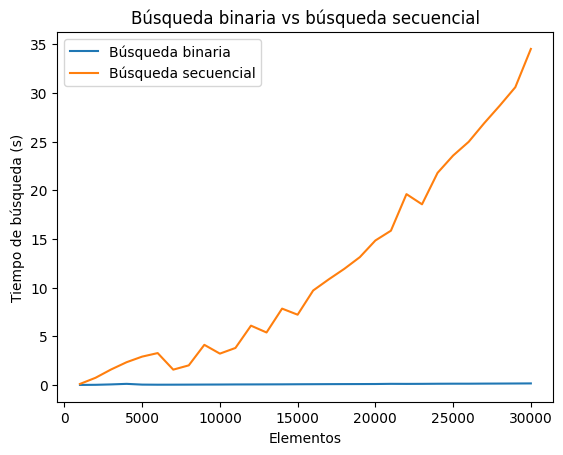

In [4]:
import matplotlib.pyplot as plt

# observamos el comportamiento de los algoritmos con un gráfico:

plt.plot(df['búsqueda_binaria'], label='Búsqueda binaria')
plt.plot(df['búsqueda_secuencial'], label='Búsqueda secuencial')

# Agregar título y etiquetas de eje
plt.title('Búsqueda binaria vs búsqueda secuencial')
plt.xlabel('Elementos')
plt.ylabel('Tiempo de búsqueda (s)')

# Agregar leyenda y mostrar gráfico
plt.legend()
plt.show()

Al observar los datos, podemos hacer 2 suposiciones: 

1.   Algoritmo de búsqueda binaria:
                                   "El tiempo de ejecución sigue un patrón
                                   lineal con una pendiente casi igual a cero."
2.   Algorítmo de búsqueda secuencial: 
                                   "El tiempo de ejecución sigue un patrón
                                   exponencial."

Basado en estas observaciones, procedo a verificar si los datos del tiempo de ejecución del algoritmo de búsqueda secuencial se ajustan a un patrón exponencial. El patrón lineal para el algoritmo de búsqueda binaria me parece lo suficientemente obvio (avísame si para ti no es obvio; puedes contribuir con un analisis para esos datos, espero tu push request).

In [5]:
#eliminamos la columna busqueda_binaria ya que sólo trabajaremos con el algoritmo de búsqueda secuencial:
df = df.drop('búsqueda_binaria', axis=1)
df

,elementos,búsqueda_secuencial
1000,1000.0,0.104913
2000,2000.0,0.736812
3000,3000.0,1.589857
4000,4000.0,2.337551
5000,5000.0,2.911888
6000,6000.0,3.274703
7000,7000.0,1.575011
8000,8000.0,2.014301
9000,9000.0,4.122254
10000,10000.0,3.218897


In [6]:
df = df.reset_index(drop=True) # para recetear el índice, y que la numeración aparezca de 0 a n.
df

,elementos,búsqueda_secuencial
0,1000.0,0.104913
1,2000.0,0.736812
2,3000.0,1.589857
3,4000.0,2.337551
4,5000.0,2.911888
5,6000.0,3.274703
6,7000.0,1.575011
7,8000.0,2.014301
8,9000.0,4.122254
9,10000.0,3.218897


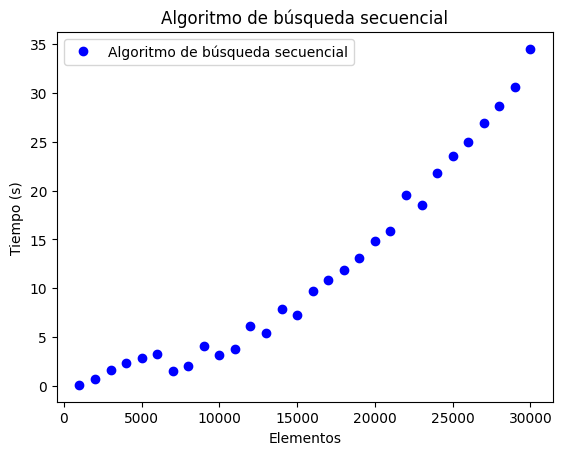

In [7]:
# graficar solamente los datos de la búqueda secuencial
x,y = (df['elementos'].values, df['búsqueda_secuencial'].values)
plt.plot(x,y, 'bo',label='Algoritmo de búsqueda secuencial') # b = blue, o = marcador en forma de círculo
plt.title('Algoritmo de búsqueda secuencial')
plt.xlabel('Elementos')
plt.ylabel('Tiempo (s)')
plt.legend()
plt.show()

Como se mencionó antes, a simple vista, suponemos que la función exponencial parece ser una aproximación inicial adecuada. La función exponencial surge cuando una cantidad crece o decae a una tasa proporcional a su valor actual. Los datos producidos parecen obedecer esta aproximación teórica. Para este caso, la forma canónica de la función exponencial es:

```
y = a + b*c**x,    # para b>o  y  b!=1.
```

Cada uno de los parámetros en la ecuación tiene un papel específico en la definición de la función. A continuación se describen los roles de cada parámetro:

a es la intersección en el eje y o el valor de y cuando x es igual a cero. Controla el desplazamiento vertical de la curva y determina dónde comienza la función.

b es el coeficiente de la base de la función. En otras palabras, b determina cuánto se multiplica c**x por sí mismo.

c es la base que se eleva a la potencia de x. c determina dónde comienza la función y su valor también influye en la tasa de crecimiento de la función.

x es la variable independiente. Es decir, la función exponencial se aplica a x. x determina en qué punto de la curva se encuentra la función exponencial.

En resumen, a determina la posición vertical, b controla parte de la tasa de crecimiento y c controla la forma de la curva de la función exponencial y x es el exponente. Combinados, estos parámetros permiten ajustar la función exponencial a un conjunto de datos específico y modelar cómo cambia una variable en función de otra.

<ipython-input-8-8fcf67fdfe20>:4: RuntimeWarning: overflow encountered in power
  y = a + b*c**x


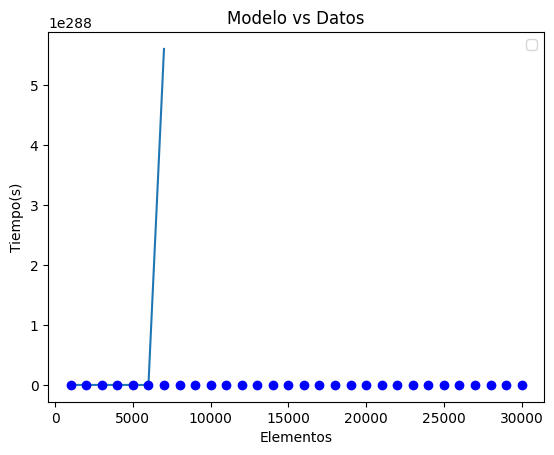

In [8]:
# definiendo el modelo exponencial

def exponencial(x, a, b , c):
  y = a + b*c**x
  return y

#ejecutamos un primer modelo (estos valores son totalmente arbitrarios)
a = 0.0
b = 0.1
c = 1.1

y_pred = exponencial(x, a, b, c)

#predicción de puntos

plt.plot(x,y_pred)
plt.plot(df['elementos'].values, df['búsqueda_secuencial'].values, 'bo')
plt.title('Modelo vs Datos')
plt.ylabel('Tiempo(s)')
plt.xlabel('Elementos') # poner que linea es que
plt.legend()
plt.show()

Claramente hay una desproporción de escalas entre el modelo y los datos. Para aliviar esto, una práctica común es normalizar los datos.

In [9]:
# Normalizamos el eje de las abcisas, ya que es lo que hace que la función 
# exponencial tenga ese comportamiento de escalamiento desproporcionado.
df['elementos'] = df['elementos']/max(df['elementos'])
df

,elementos,búsqueda_secuencial
0,0.033333,0.104913
1,0.066667,0.736812
2,0.100000,1.589857
3,0.133333,2.337551
4,0.166667,2.911888
5,0.200000,3.274703
6,0.233333,1.575011
7,0.266667,2.014301
8,0.300000,4.122254
9,0.333333,3.218897


In [10]:
# Dado que se ajustará un modelo al conjunto de datos, se debera realizar una validación del mismo
# por lo que es recomendable separar el conjunto de datos en: el conjunto de entrenamiento y validación.

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(df['elementos'], df['búsqueda_secuencial'], test_size=0.2, random_state=42)

De ahora en adelante solamente trabajaremos con de entrenamiento, y se dejara fuera al conjunto de validación. Esta es una practica común en este tipo de analisis,  más adelante quedará claro el por qué.

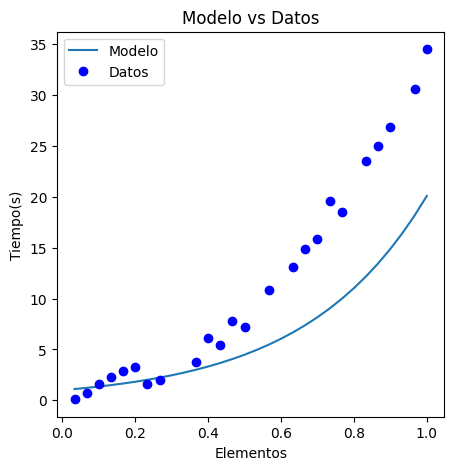

In [11]:
# Nuevo grafico con los datos normalizados ahora la escala es compatible.
def exponencial(x, a, b , c):
  y = a + b*c**x
  return y

# Nuevamente, estos valores son totalmente arbitrarios
a = 0.0
b = 1
c = 1.0001 

y_pred = exponencial(x, a, b, c)

plt.figure(figsize=(5,5))
plt.plot(df['elementos'],y_pred,label='Modelo')
plt.plot(x_train,y_train, 'bo',label='Datos') # linea para graficar solo el conjunto de entrenamiento
plt.title('Modelo vs Datos')
plt.ylabel('Tiempo(s)')
plt.xlabel('Elementos') 
plt.legend()
plt.show()

La tarea aquí es encontrar los mejoresparametros para el modelo. Para buscar los mejores parametros podemos utilizar curve_fit, la cual utiliza cuadrados mínimos no lineales para cuadrar con la función exponencial. popt son los parametros optimizados. Para hacerlo definimos a la funcion como una función lambda, según se especifica en la documentación para el uso de curve_fit.

In [12]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(lambda t,a,b,c: a + b*c**(x_train),x_train, y_train)

# Guardamos los parametros del modelo con los parametos que optimizamos con curve_fit
a = popt[0]
b = popt[1]
c = popt[2]
print(f'Los parametros optimizados son:\n a:{a}, b:{b}, c:{c}')

Los parametros optimizados son:
 a:-4.697264501415222, b:4.5111074987608735, c:8.693135244059532


Ya que se tienen los parametros optimizados procedemos a modificar el modelo con estos parámetros y a ajustar los datos con este:

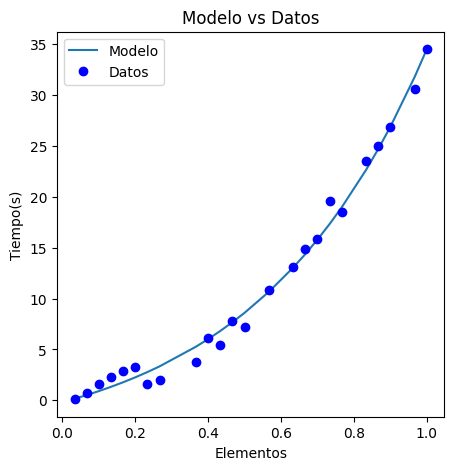

In [13]:
#el argumento x de la función exponencial debe ser consistente con los parametros: test_size=0.2, random_state=42
# una solución seria ordenar de menor a mayor la columna x_train
x= x_train.sort_values()

y_pred = exponencial(x, a, b, c) # Este modelo ya contiene los parametros a,b,c optimizados.

# Gráfico del ajuste del modelo para los datos de entrenamiento
plt.figure(figsize=(5,5))
plt.plot(x,y_pred, label= 'Modelo')
plt.plot(x_train,y_train, 'bo',label='Datos')

plt.title('Modelo vs Datos')
plt.ylabel('Tiempo(s)')
plt.xlabel('Elementos') 
plt.legend()
plt.show()

Ahora es el momento de ver la exactitud del modelo. Para lo que primeramente se utilizará el set de validación creado previamente: 

In [14]:
# podemos hacer una inspección elemento a elemento, por ejemplo, para x= 0.8
x_prueba = 0.4  # valor de x a predecir
y_prueba = exponencial(x_prueba, a, b, c)  # predecir el valor de y para x_pred
print(f'El valor de y para x={x_prueba} es {y_prueba}') 

El valor de y para x=0.4 es 6.01678752332628


In [15]:
# el valor real para x=0.4 es:
valor_real = df.loc[df['elementos'] == 0.4, 'búsqueda_secuencial'].values[0]
print(valor_real)

6.090896129608154


In [16]:
import numpy as np

#Podemos calcular el error porcentual para este par de valores:
error_porcentual = (np.abs((y_prueba - valor_real)/valor_real))*100
error_porcentual

1.2167110504746361

Como vemos, el error porcentual es aceptable. Pero esta evaluación sólo se realizó para un solo dato. Realicemos entonces otras puebas estadísticas comunes:

In [17]:
import numpy as np

# utilizando el set de validacion en el modelo
y_pred = exponencial(x_valid, *popt)

# Evaluacion:

print("Suma residual de cuadrados (RSS): %.2f" % np.mean((y_pred - y_valid)**2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_pred , y_valid) )

Suma residual de cuadrados (RSS): 0.55
R2-score: 0.99


En un modelo estadístico, la suma residual de cuadrados (residual sum of squares o RSS en inglés) es una medida de la diferencia entre los valores observados y los valores predichos por el modelo. Es decir, mide la cantidad de variabilidad en los datos que no se explica por el modelo.

En este caso, si la suma residual de cuadrados es de 0.55, significa que la cantidad de variabilidad en los datos que no se explica por el modelo es relativamente baja. Por lo tanto, se podría decir que el modelo es capaz de explicar la mayoría de los datos.

El R2-score, por otro lado, es una medida de qué tan bien se ajustan los datos al modelo. Toma valores entre 0 y 1, donde 1 significa que el modelo se ajusta perfectamente a los datos y 0 significa que el modelo no se ajusta en absoluto. Un R2-score de 0.99 indica que el modelo se ajusta muy bien a los datos y que explica el 99% de la variabilidad observada en los datos.

En resumen, si la suma residual de cuadrados es baja y el R2-score es alto, esto sugiere que el modelo es aceptablemente bueno para explicar los datos y que puede ser una buena herramienta para hacer predicciones o para entender las relaciones entre las variables en cuestión.

## Conclusiones

En este proyecto se analizó el tiempo de ejecución de dos algoritmos de búsqueda: búsqueda binaria y búsqueda secuencial. Se generaron datos de tiempo que le tomó a cada algoritmo hacer una búsqueda en distintos cnojuntos de datos. Los resultados mostraron que el algoritmo de búsqueda binaria presentó un comportamiento lineal, con pendiente casi de 0. Esto indica que el tiempo de ejecución de la búsqueda binaria aumenta de manera constante a medida que se incrementa el tamaño del conjunto de datos. Por otro lado, el algoritmo de búsqueda secuencial presentó un comportamiento exponencial, lo que indica que el tiempo de ejecución aumenta de manera significativa a medida que se incrementa el tamaño de los datos.

Es importante destacar que estos resultados pueden ser útiles para la selección del algoritmo más adecuado en función del tamaño de los datos. Por ejemplo, para conjuntos de datos pequeños, el algoritmo de búsqueda secuencial podría ser una buena opción debido a que su tiempo de ejecución es relativamente bajo. Sin embargo, para conjuntos de datos más grandes, la búsqueda binaria sería una mejor opción debido a que su tiempo de ejecución crece de manera más lenta en comparación con la búsqueda secuencial.

En conclusión, este proyecto proporciona información valiosa para aquellos que necesiten implementar algoritmos de búsqueda en sus aplicaciones.

Nota: Es relevante mencionar que se debe considerar el tiempo de ordenamiento, ya que el algoritmo de búsqueda binaria solamente funciona para este tipo de datos. En el futuro este analisis se ampliará con dicha consideración.